In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mnist_train = pd.read_csv("../../data/train.csv")
train_data = mnist_train.drop("label",1).values
train_target = mnist_train["label"].values

mnist_test = pd.read_csv("../../data/test.csv")
test_data = mnist_test.values

<function matplotlib.pyplot.show>

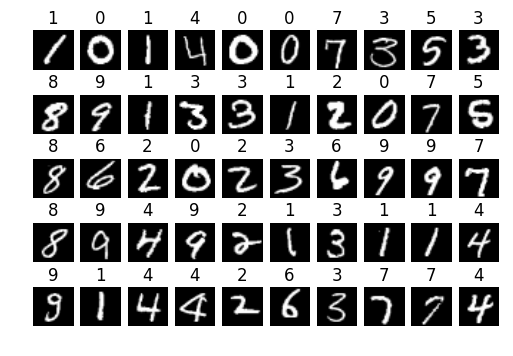

In [72]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_data[i,:].reshape(28,28), cmap='gray')
    plt.title(train_target[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [78]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

test_predictions = clf.predict(test_data)


<function matplotlib.pyplot.show>

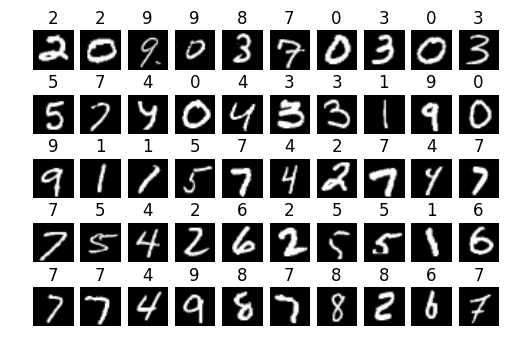

In [80]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_data[i,:].reshape(28,28), cmap='gray')
    plt.title(test_predictions[i])
    plt.axis('off')
    plt.grid(True)
plt.show

In [87]:
from sklearn.ensemble import RandomForestClassifier
randclf = RandomForestClassifier(n_estimators = 100)
randclf.fit(train_data,train_target)

test_pred = randclf.predict(test_data)

<function matplotlib.pyplot.show>

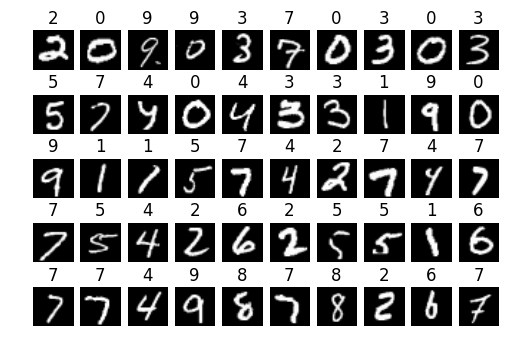

In [88]:
plt.figure(1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(test_data[i,:].reshape(28,28), cmap='gray')
    plt.title(test_pred[i])
    plt.axis('off')
    plt.grid(True)
plt.show